Make the import

In [1]:
import numpy as np
import myonset as myo

Load data and events

In [2]:
data = np.load('example_data.npy')

In [3]:
events = myo.load_continuous('example_events.csv', col_sample=0, col_code=2, col_chan=3, sf=2048)

## Segment based on events

Set trigger id values used for segmentation (e.g., stimulus or fixation cross): adapt to your experiment

In [4]:
code_t0 = [11,12,21,22]

Segment and extract data epochs

In [5]:
epochs_events = events.segment(code_t0=code_t0, tmin=-0.5, tmax=1)
epoch_time = myo.times(-0.5,1,events.sf)

Found 16 epoch(s).


In [6]:
epochs_data = epochs_events.get_data(data)

# Automatic detection of EMG onsets and offsets

### Example to run automatic detection on trial 5, channel 1 

In [7]:
current_epoch = 5
current_channel = 0
onsets,offsets = myo.get_onsets(epochs_data[current_epoch,current_channel,:], epoch_time, sf=epochs_events.sf,\
                                th_raw=5, use_raw=True, mbsl_raw=None, stbsl_raw=None,\
                                th_tkeo=10, use_tkeo=True, mbsl_tkeo=None, stbsl_tkeo=None)

Visualize signal and onsets and offsets (blue and cyan crosses)

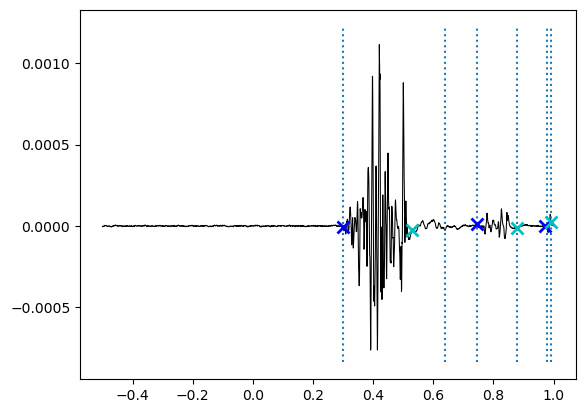

In [8]:
myo.show_trial(epochs_data[current_epoch,current_channel,:], epoch_time, sf=epochs_events.sf,\
                           th_raw=5, use_raw=True, mbsl_raw=None, stbsl_raw=None,\
                           th_tkeo=10, use_tkeo=True, mbsl_tkeo=None, stbsl_tkeo=None)

Insert detected onsets and offsets in epochs_events

In [9]:
code_onset = 4
onsets_events = myo.Events(sample=onsets, time=epoch_time[onsets], code=[code_onset]*len(onsets), chan=[current_channel]*len(onsets), sf=epochs_events.sf)
epochs_events.list_evts_trials[current_epoch].add_events(onsets_events)

code_offset = 5
offsets_events = myo.Events(sample=offsets, time=epoch_time[offsets], code=[code_offset]*len(offsets), chan=[current_channel]*len(offsets), sf=epochs_events.sf)
epochs_events.list_evts_trials[current_epoch].add_events(offsets_events)

### Loop on every trial and all EMG channels

In [10]:
for current_epoch in range(epochs_events.nb_trials()):
    for current_channel in [0,1]:
        
        onsets,offsets = myo.get_onsets(epochs_data[current_epoch,current_channel,:], epoch_time, sf=epochs_events.sf,\
                                        th_raw=5, use_raw=True, mbsl_raw=None, stbsl_raw=None,\
                                        th_tkeo=10, use_tkeo=True, mbsl_tkeo=None, stbsl_tkeo=None)
        
        # Put in event structure
        onsets_events = myo.Events(sample=onsets, time=epoch_time[onsets],\
                                   code=[code_onset]*len(onsets), chan=[current_channel]*len(onsets), sf=epochs_events.sf) 
        offsets_events = myo.Events(sample=offsets, time=epoch_time[offsets],\
                                    code=[code_offset]*len(offsets), chan=[current_channel]*len(offsets), sf=epochs_events.sf) 
        
        # Add in epochs events
        epochs_events.list_evts_trials[current_epoch].add_events(onsets_events)
        epochs_events.list_evts_trials[current_epoch].add_events(offsets_events)
        

# Save in new marker file

First put epoch events in continuous time

In [11]:
events_with_detection = epochs_events.as_continuous(drop_duplic=True)[0]

Checking for duplicates in events...
6 event(s) removed.


Combine with original events

In [12]:
events_with_detection.add_events(events, drop_duplic=True)

Checking for duplicates in events...
48 event(s) removed.


Save events with detection

In [13]:
events_with_detection.to_csv('example_events_with_detection.csv')